### Analysis of the Numpy.Random Package

In [ ]:
#1. Explain the overall purpose of the package.

#3. Explain the use and purpose of at least five “Distributions” functions.
#4. Explain the use of seeds in generating pseudorandom numbers.

#### Introduction

**NumPy** is the fundamental package for scientific computing with Python. [Numpy.Random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) uses the [Mersenne twister sequence](https://en.wikipedia.org/wiki/Mersenne_Twister) to generate random numbers in a deterministic fashion, i.e they are not entirely random but 'pseudo' random.  For this reason the  Numpy.Random package is unsuitable for critical security or serious cryptgraphic work, but is very useful for generating random numbers in a contolled or experimental environment.  There is also a need to 'seed' the the random value due to their inherent pseudo-randomness as sequences of the same random numbers can reoccur.

#### Q2. Explain the use of the “Simple random data” and “Permutations” functions.

**Simple random data** is a sample of data (i.e a subset) chosen from a larger sample (aka a population). Each element is chosen randomly and entirely by chance, such that each element/individual has the same probability of being chosen at any stage during the sampling process. Each subset of elements has the same probability of being chosen for the sample as any other subset of elements. see [Ref](https://en.wikipedia.org/wiki/Simple_random_sample).<br>
**Permutation functions** are functions that essentially arrange/rearrange all the elements of a set in some order and can produce a number of different subsets with varying sequences or combinations of elements.  Re-ordering a set is referred to as permuting.  In the graphic below, we have 6 rows with 3 difference coloured ball sequences and therefore the 6 rows have all different permutations.


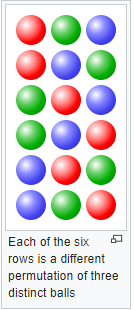

In [1]:
#Let's look at some of the functions and work out what they do.
import numpy as np
#function no. 1
np.random.rand()

0.9716471119910576

We see that rand() returns a random number between 0 & 1, without 'shape' and without a 'distribution'.
According to the reference material [numpy.random.rand](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html#numpy.random.rand), the rand function returns an array of numbers with a given shape from a uniform distribution between 0 & 1, the square bracket indicating that zero is inlcuded, and the round bracket indicating that one is not included [0,1)

In [2]:
#Shape refers to the dimensions of the array
#Uniform distribution refers to ........
#Let's insert some integers to see what 'shape' we can put on the array 

np.random.rand(4,7)

array([[0.59384411, 0.86429549, 0.15889242, 0.07711306, 0.8084086 ,
        0.35049914, 0.77162349],
       [0.62149992, 0.30337745, 0.01347801, 0.41026106, 0.12238348,
        0.59047285, 0.68689973],
       [0.17448696, 0.60531066, 0.052194  , 0.73609605, 0.58958612,
        0.05399479, 0.45777072],
       [0.97172959, 0.97752391, 0.24827284, 0.26696444, 0.11762374,
        0.74245801, 0.3314838 ]])

From our example above we see that the integer values (4,7) returns 4 arrays inside a single array, each single array containing 7 numbers between 0 & 1.  These 'numbers' are floating numbers.  We test for randomness by re-running the the function again and again.

In [3]:
np.random.rand(4,7)

array([[0.30220027, 0.37366096, 0.0013786 , 0.50567351, 0.86824736,
        0.03220437, 0.12124743],
       [0.53673203, 0.99189401, 0.91676357, 0.63522992, 0.34430139,
        0.89158556, 0.76123807],
       [0.6582763 , 0.18421677, 0.70864942, 0.29960365, 0.56313743,
        0.76491144, 0.28881587],
       [0.57802144, 0.13757127, 0.84239391, 0.71207053, 0.66260702,
        0.2334949 , 0.01923499]])

Returning to the reference term **'uniform distribution'** - we will look at its uniformity by plotting a distribution. First let's read a [definition](https://stattrek.com/statistics/dictionary.aspx?definition=uniform_distribution) as - *"in the context of probability distributions, uniform distribution refers to a probability distribution for which all of the values that a random variable can take on occur with equal probability"*.  **Ok, let's plot!** 

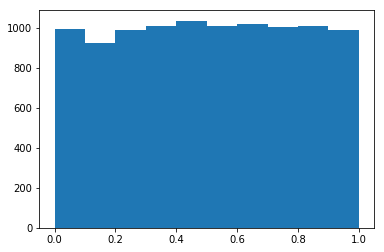

In [4]:
#Create a large array 'A' of random numbers with a uniform distribution
A = np.random.rand(10000)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(A)
plt.show()

We observe from the plot that 10,000 numbers have been generated between 0 & 1, and these numbers have been placed into 10 bins (0.1, 0.2, 0.3....) for the purpose of plotting the histogram. We expect that if we re-run this code again and again, the histograms will look similar i.e. there is a **uniformity** to the distribution of numbers generated between 0 & 1.


However, the rand function appears to be limited to floating point numbers between 0 & 1.  To go outside of this limitation we will look at another function called [Uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html#numpy.random.uniform).  We note from the definition of 'uniform' that we determine the *interval* or the range of values from which a distribution is extracted by assigning 'low' and 'high' values, from which the low value is included and the high value is excluded. **Let's have a look!**

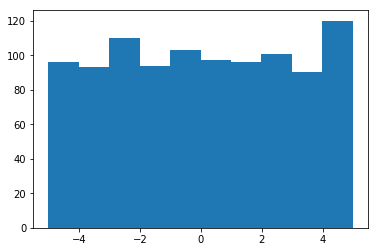

In [5]:
u = np.random.uniform(-5,5,1000)
plt.hist(u)
plt.show()

We now see that we can go beyond 0 & 1 with the *uniform* function to values including negative numbers. As before all of the values in the 'range' have an equal chance of occuring. The Probability Density Function is 1 and is expressed as follows;

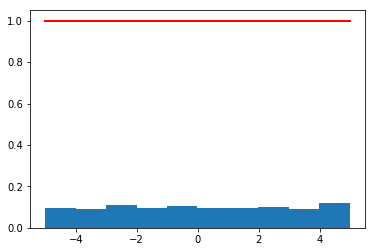

In [6]:
#Probability Density Function
count, bins, ignored = plt.hist(u, 10, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

We see from the plot above that there is an equal probability of a number occuring in each of the ten bins.  However we will need to look at the **normal** distribution to see a distribution of samples influenced by a large number of small but random disturbances - see reference [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal).  A normal distribution (also know as the 'bell-shaped curve') is described by just two numbers, i.e. the mean and the standard devaiation.  The mean is the average and is where the bell curve peaks.  The Standard Deviation describes how wide or narrow the curve is.

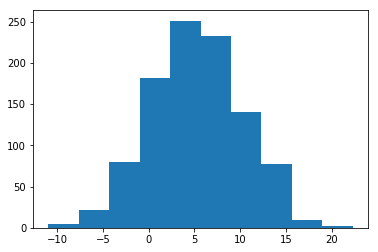

In [7]:
#To examine the normal distribution, we call the following function numpy.random.normal(loc=0.0, scale=1.0, size=None).
#'loc' refers to the centre of the distribution, 'scale' refers to the spread, and size is the output shape.
n = np.random.normal(5,5,1000)
plt.hist(n)
plt.show()


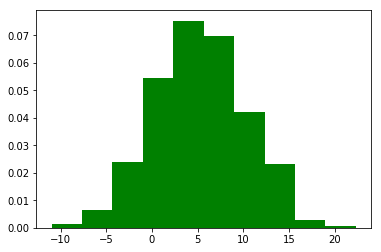

In [13]:
#Let's change some of the parameters of the histogram
plt.hist(n,10, density=True, facecolor='g',)
plt.show()

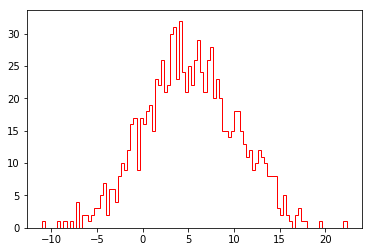

In [19]:
# using H=hist(my_data,bins=my_bin,histtype='step',color='r')
plt.hist(n,100,histtype='step', color='r')
plt.show()

In [ ]:
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

In [ ]:
# Now let's have a look at some other distributions functions

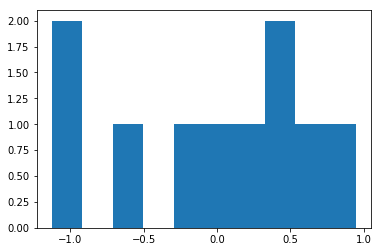

In [30]:
k = np.random.standard_normal(10)
k
plt.hist(k)
plt.show()


To generate random numbers from a normal distribution we use the normalvariate function (normalvariate(meu,sigma) where meu is the mean and sigma is the standard deviation.

In [35]:
#By way of example let's generate 20 numbers from a bell curve with mean of zero and standard deviation of 1
import random
for i in range(20):
    print(random.normalvariate(0,1))
    plt.show()

1.6901142551744996
-1.4978542943367195
0.3649002988780484
-0.5512639419017137
-2.037163125297529
2.0304814565311737
-0.1617887375934466
-1.2255628792203204
0.3187483116705581
1.9802668912231647
-0.6090254232096294
1.5724223559728603
0.27005473448084855
-2.0941231344338194
1.6112872068640238
1.0059334199573768
-1.1846279792166081
0.5783100960288362
-0.009457757980236622
-1.7374569987465431


In [ ]:










np.random.random_integers(1,5+1)